In [4]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import numpy as np

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *
from LazyLuna.Tables  import *
from LazyLuna.Figures import *

In [5]:
# basepaths
bp        = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/JGold'
bp_annos2 = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/FCN'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs'

In [ ]:
# get the paths of imgs and annotations via SeriesInstanceUIDs
imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)

print('Nr of path tuples: ', len(imgsanno_paths))
case_names = sorted([c[0] for c in imgsanno_paths])
from pprint import pprint
print('Existing Annotations: ', len(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])])))
pprint(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])]))

cases = []
sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()
for count, (imgp,annop) in enumerate(imgsanno_paths):
    print(count)
    print(os.path.basename(imgp), os.path.basename(annop))
    st = time()
    case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
    case = sax_cine_view.initialize_case(case)
    case = sax_cs_view  .initialize_case(case)
    case.store(bp_cases)
    cases.append(case)
    print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
    print()

In [6]:
cases  = [pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in os.listdir(bp_cases)]
cases1 = sorted([c for c in cases if c.reader_name=='Gold'], key=lambda c: c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='FCN'],  key=lambda c: c.case_name)

sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()
ccs = [Case_Comparison(sax_cs_view.customize_case(c1), sax_cs_view.customize_case(c2)) for c1,c2 in zip(cases1,cases2)]

In [ ]:
table = CC_ClinicalResultsTable()
table.calculate(ccs, True)
table.add_bland_altman_dataframe(ccs)
display(table.df)

In [4]:
table = CC_ClinicalResultsAveragesTable()
table.calculate(ccs)
display(table.df)

,Clinical Result,Gold,FCN,"Diff(Gold, FCN)"
0,LVESV,86.2,85.2,1.0
1,LVEDV,181.5,179.6,1.8
2,RVESV,80.5,67.0,13.5
3,RVEDV,164.0,150.2,13.8
4,LVSV,95.3,94.5,0.8
5,LVEF,54.5,54.2,0.3
6,RVSV,83.5,83.2,0.3
7,RVEF,50.8,55.8,-5.0
8,LVM,106.5,100.9,5.6
9,RVM,0.0,0.0,0.0


In [ ]:
plot = SAX_BlandAltman()
plot.visualize(ccs)
plot.store('/Users/dietrichhadler/Desktop')
plot = SAX_Candlelight()
plot.visualize(ccs)
plot.store('/Users/dietrichhadler/Desktop')

In [ ]:
view = SAX_CINE_View()
case = view.customize_case(case)
print(case.case_name)

print(case.type)
print(case.categories)
print(case.other_categories)
print(case.all_imgs_sop2filepath.keys())
for k in case.all_imgs_sop2filepath.keys():
    print(k, len(case.all_imgs_sop2filepath[k]), end=', ')
for cr in case.crs:
    print(cr.name, cr.get_cr(), end=', ')

In [ ]:
vis = SAX_BlandAltman()
vis.calculate(ccs)
vis.fig

In [ ]:
vis = SAX_Candlelight()
vis.calculate(ccs)
vis.fig

In [130]:
cplot = Qualitative_Correlationplot()
cplot.visualize(ccs, metric='ml diff')
cplot
#cplot.store('/Users/dietrichhadler/Desktop')

0  of  3, took:  1.314499855041504
1  of  3, took:  1.452059030532837
2  of  3, took:  1.83620023727417


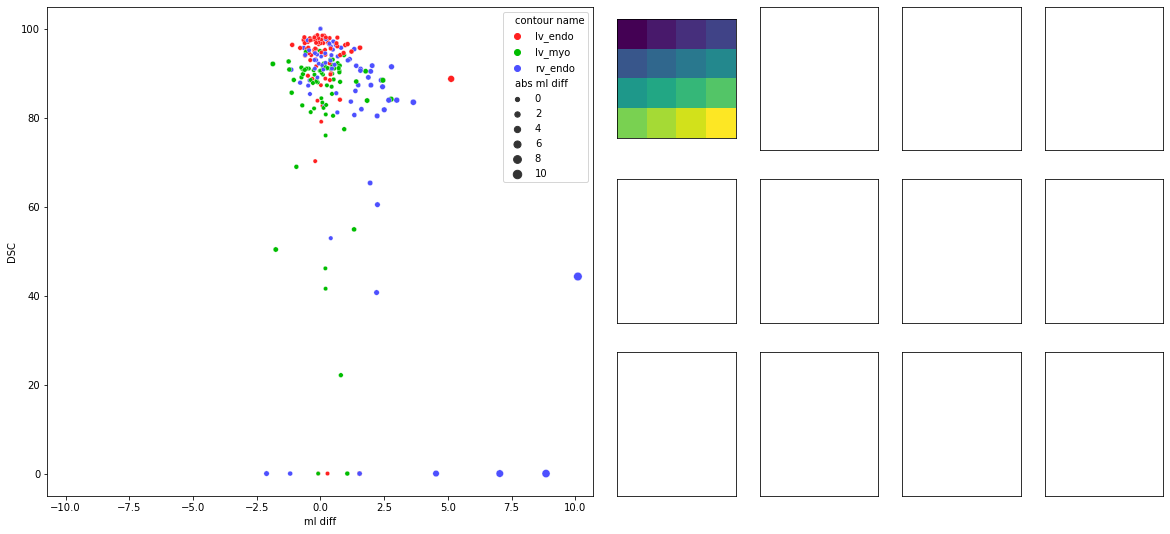

In [131]:
cplot